In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from numpy.random import seed
seed(8)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
def read_in_and_split_data(iris_data):
    train_data, test_data, train_targets, test_targets = train_test_split(iris_data['data'], iris_data['target'], test_size=0.10)
    return train_data, test_data, train_targets, test_targets

In [4]:
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [5]:
train_targets

array([2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0,
       1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0,
       0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2,
       2, 2, 1])

In [6]:
# Convert targets to a One-Hot Encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

#### Build the Neural Network Model

In [7]:
def get_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.he_uniform(), bias_initializer=tf.keras.initializers.Constant(value=1), input_shape=(input_shape[0],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [8]:
model = get_model(train_data[0].shape)

In [9]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
compile_model(model)

In [11]:
def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(train_data, train_targets, epochs=epochs, batch_size=40, validation_split=0.15)
    return history

In [12]:
history = train_model(model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 0s 73ms/step - loss: 1.1292 - accuracy: 0.3158 - val_loss: 1.0088 - val_accuracy: 0.4286
Epoch 2/800
3/3 [==============================] - 0s 6ms/step - loss: 1.0901 - accuracy: 0.3158 - val_loss: 0.9908 - val_accuracy: 0.4286
Epoch 3/800
3/3 [==============================] - 0s 6ms/step - loss: 1.0567 - accuracy: 0.3158 - val_loss: 0.9667 - val_accuracy: 0.4286
Epoch 4/800
3/3 [==============================] - 0s 6ms/step - loss: 1.0290 - accuracy: 0.3158 - val_loss: 0.9439 - val_accuracy: 0.4286
Epoch 5/800
3/3 [==============================] - 0s 6ms/step - loss: 1.0051 - accuracy: 0.3158 - val_loss: 0.9238 - val_accuracy: 0.4286
Epoch 6/800
3/3 [==============================] - 0s 6ms/step - loss: 0.9842 - accuracy: 0.3158 - val_loss: 0.9051 - val_accuracy: 0.4286
Epoch 7/800
3/3 [==============================] - 0s 6ms/step - loss: 0.9616 - accuracy: 0.3158 - val_loss: 0.8877 - val_accuracy: 0.4286
Epoch 8/800
3/3 [=========

3/3 [==============================] - 0s 6ms/step - loss: 0.0824 - accuracy: 0.9825 - val_loss: 0.2346 - val_accuracy: 0.9048
Epoch 60/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0808 - accuracy: 0.9912 - val_loss: 0.2283 - val_accuracy: 0.9048
Epoch 61/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0804 - accuracy: 0.9825 - val_loss: 0.2348 - val_accuracy: 0.9048
Epoch 62/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0788 - accuracy: 0.9912 - val_loss: 0.2460 - val_accuracy: 0.9048
Epoch 63/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0760 - accuracy: 0.9825 - val_loss: 0.2183 - val_accuracy: 0.8571
Epoch 64/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0758 - accuracy: 0.9825 - val_loss: 0.2281 - val_accuracy: 0.9048
Epoch 65/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0734 - accuracy: 0.9825 - val_loss: 0.2236 - val_accuracy: 0.9048
Epoch 66/800
3/3 [===============

3/3 [==============================] - 0s 6ms/step - loss: 0.0488 - accuracy: 0.9825 - val_loss: 0.2466 - val_accuracy: 0.9048
Epoch 118/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0492 - accuracy: 0.9912 - val_loss: 0.2383 - val_accuracy: 0.9048
Epoch 119/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0469 - accuracy: 0.9825 - val_loss: 0.2606 - val_accuracy: 0.9048
Epoch 120/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0499 - accuracy: 0.9825 - val_loss: 0.2847 - val_accuracy: 0.9048
Epoch 121/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0504 - accuracy: 0.9825 - val_loss: 0.2362 - val_accuracy: 0.9048
Epoch 122/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0464 - accuracy: 0.9825 - val_loss: 0.2671 - val_accuracy: 0.9048
Epoch 123/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0465 - accuracy: 0.9912 - val_loss: 0.2699 - val_accuracy: 0.9048
Epoch 124/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.0365 - accuracy: 0.9825 - val_loss: 0.2619 - val_accuracy: 0.9048
Epoch 176/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0467 - accuracy: 0.9737 - val_loss: 0.2504 - val_accuracy: 0.9048
Epoch 177/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0370 - accuracy: 0.9912 - val_loss: 0.3246 - val_accuracy: 0.9048
Epoch 178/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0493 - accuracy: 0.9825 - val_loss: 0.3165 - val_accuracy: 0.9048
Epoch 179/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.9825 - val_loss: 0.2448 - val_accuracy: 0.9048
Epoch 180/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0498 - accuracy: 0.9737 - val_loss: 0.2776 - val_accuracy: 0.9524
Epoch 181/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0679 - accuracy: 0.9825 - val_loss: 0.3791 - val_accuracy: 0.9048
Epoch 182/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.0489 - accuracy: 0.9649 - val_loss: 0.4123 - val_accuracy: 0.9048
Epoch 234/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0798 - accuracy: 0.9649 - val_loss: 0.3753 - val_accuracy: 0.9048
Epoch 235/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0513 - accuracy: 0.9737 - val_loss: 0.2531 - val_accuracy: 0.9048
Epoch 236/800
3/3 [==============================] - 0s 6ms/step - loss: 0.1198 - accuracy: 0.9386 - val_loss: 0.3158 - val_accuracy: 0.9524
Epoch 237/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.9825 - val_loss: 0.4115 - val_accuracy: 0.9048
Epoch 238/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0737 - accuracy: 0.9737 - val_loss: 0.3361 - val_accuracy: 0.9048
Epoch 239/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0419 - accuracy: 0.9737 - val_loss: 0.2520 - val_accuracy: 0.9048
Epoch 240/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9825 - val_loss: 0.3149 - val_accuracy: 0.9524
Epoch 292/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.9825 - val_loss: 0.3665 - val_accuracy: 0.9048
Epoch 293/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0397 - accuracy: 0.9825 - val_loss: 0.3157 - val_accuracy: 0.9524
Epoch 294/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0393 - accuracy: 0.9912 - val_loss: 0.2881 - val_accuracy: 0.9048
Epoch 295/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0358 - accuracy: 0.9912 - val_loss: 0.3460 - val_accuracy: 0.9524
Epoch 296/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0364 - accuracy: 0.9825 - val_loss: 0.3185 - val_accuracy: 0.9524
Epoch 297/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.2943 - val_accuracy: 0.9048
Epoch 298/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.0599 - accuracy: 0.9825 - val_loss: 0.3584 - val_accuracy: 0.9524
Epoch 350/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.3047 - val_accuracy: 0.9048
Epoch 351/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0420 - accuracy: 0.9825 - val_loss: 0.3231 - val_accuracy: 0.9524
Epoch 352/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0246 - accuracy: 0.9825 - val_loss: 0.3456 - val_accuracy: 0.9524
Epoch 353/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 0.9825 - val_loss: 0.3290 - val_accuracy: 0.9524
Epoch 354/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0306 - accuracy: 0.9912 - val_loss: 0.3106 - val_accuracy: 0.9048
Epoch 355/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.3356 - val_accuracy: 0.9524
Epoch 356/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9912 - val_loss: 0.3382 - val_accuracy: 0.9524
Epoch 408/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0222 - accuracy: 0.9912 - val_loss: 0.3401 - val_accuracy: 0.9524
Epoch 409/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0233 - accuracy: 0.9825 - val_loss: 0.3468 - val_accuracy: 0.9524
Epoch 410/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0242 - accuracy: 0.9912 - val_loss: 0.3349 - val_accuracy: 0.9048
Epoch 411/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 0.9912 - val_loss: 0.3406 - val_accuracy: 0.9524
Epoch 412/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.3401 - val_accuracy: 0.9524
Epoch 413/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9825 - val_loss: 0.3466 - val_accuracy: 0.9524
Epoch 414/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.3599 - val_accuracy: 0.9524
Epoch 466/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0189 - accuracy: 0.9912 - val_loss: 0.3597 - val_accuracy: 0.9524
Epoch 467/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0190 - accuracy: 0.9912 - val_loss: 0.3575 - val_accuracy: 0.9524
Epoch 468/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0198 - accuracy: 0.9912 - val_loss: 0.3593 - val_accuracy: 0.9524
Epoch 469/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.3577 - val_accuracy: 0.9048
Epoch 470/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0206 - accuracy: 0.9912 - val_loss: 0.3588 - val_accuracy: 0.9524
Epoch 471/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.3578 - val_accuracy: 0.9048
Epoch 472/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.0177 - accuracy: 0.9912 - val_loss: 0.3728 - val_accuracy: 0.9048
Epoch 524/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.3734 - val_accuracy: 0.9048
Epoch 525/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.3743 - val_accuracy: 0.9524
Epoch 526/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0186 - accuracy: 0.9912 - val_loss: 0.3744 - val_accuracy: 0.9524
Epoch 527/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.3737 - val_accuracy: 0.9048
Epoch 528/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.3750 - val_accuracy: 0.9524
Epoch 529/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 0.9912 - val_loss: 0.3814 - val_accuracy: 0.9524
Epoch 530/800
3/3 [========

3/3 [==============================] - 0s 5ms/step - loss: 0.0150 - accuracy: 0.9912 - val_loss: 0.3962 - val_accuracy: 0.9524
Epoch 582/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.4021 - val_accuracy: 0.9048
Epoch 583/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.3965 - val_accuracy: 0.9524
Epoch 584/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.4025 - val_accuracy: 0.9048
Epoch 585/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.3988 - val_accuracy: 0.9524
Epoch 586/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.3991 - val_accuracy: 0.9524
Epoch 587/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.4043 - val_accuracy: 0.9048
Epoch 588/800
3/3 [========

3/3 [==============================] - 0s 5ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.4154 - val_accuracy: 0.9524
Epoch 640/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.4216 - val_accuracy: 0.9048
Epoch 641/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.4188 - val_accuracy: 0.9048
Epoch 642/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.4164 - val_accuracy: 0.9524
Epoch 643/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.4123 - val_accuracy: 0.9524
Epoch 644/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 0.9825 - val_loss: 0.4193 - val_accuracy: 0.9048
Epoch 645/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0208 - accuracy: 0.9912 - val_loss: 0.4426 - val_accuracy: 0.9048
Epoch 646/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.0204 - accuracy: 0.9912 - val_loss: 0.4301 - val_accuracy: 0.9048
Epoch 698/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.4064 - val_accuracy: 0.9524
Epoch 699/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.4065 - val_accuracy: 0.9524
Epoch 700/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.4174 - val_accuracy: 0.9048
Epoch 701/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.4179 - val_accuracy: 0.9048
Epoch 702/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.4140 - val_accuracy: 0.9048
Epoch 703/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.4202 - val_accuracy: 0.9048
Epoch 704/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.4358 - val_accuracy: 0.9048
Epoch 756/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.4318 - val_accuracy: 0.9048
Epoch 757/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4376 - val_accuracy: 0.9048
Epoch 758/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.4228 - val_accuracy: 0.9524
Epoch 759/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.4340 - val_accuracy: 0.9048
Epoch 760/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.4388 - val_accuracy: 0.9048
Epoch 761/800
3/3 [==============================] - 0s 6ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.4224 - val_accuracy: 0.9524
Epoch 762/800
3/3 [========

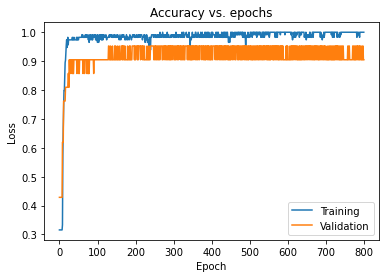

In [13]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

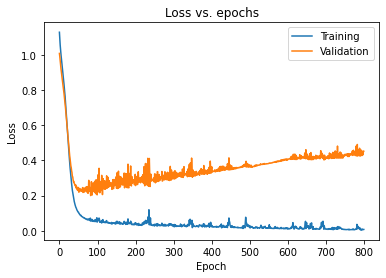

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [15]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    Your function should return the model.
    """
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), kernel_initializer=tf.keras.initializers.he_uniform(), bias_initializer=tf.keras.initializers.Constant(value=1),input_shape=(input_shape[0],)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        tf.keras.layers.Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        tf.keras.layers.BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        tf.keras.layers.Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(3, activation='softmax')
    ])
    
    return model

In [16]:
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [17]:
compile_model(reg_model)

In [18]:
reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 0s 70ms/step - loss: 2.0812 - accuracy: 0.3070 - val_loss: 2.1462 - val_accuracy: 0.1905
Epoch 2/800
3/3 [==============================] - 0s 6ms/step - loss: 2.0344 - accuracy: 0.3509 - val_loss: 2.1153 - val_accuracy: 0.1905
Epoch 3/800
3/3 [==============================] - 0s 6ms/step - loss: 2.0641 - accuracy: 0.2982 - val_loss: 2.0918 - val_accuracy: 0.1905
Epoch 4/800
3/3 [==============================] - 0s 6ms/step - loss: 2.0317 - accuracy: 0.3333 - val_loss: 2.0697 - val_accuracy: 0.1905
Epoch 5/800
3/3 [==============================] - 0s 6ms/step - loss: 2.0386 - accuracy: 0.3158 - val_loss: 2.0510 - val_accuracy: 0.1905
Epoch 6/800
3/3 [==============================] - 0s 6ms/step - loss: 1.9931 - accuracy: 0.3772 - val_loss: 2.0299 - val_accuracy: 0.1905
Epoch 7/800
3/3 [==============================] - 0s 6ms/step - loss: 2.0096 - accuracy: 0.3333 - val_loss: 2.0095 - val_accuracy: 0.1905
Epoch 8/800
3/3 [=========

3/3 [==============================] - 0s 6ms/step - loss: 1.3843 - accuracy: 0.7368 - val_loss: 1.4210 - val_accuracy: 0.6190
Epoch 60/800
3/3 [==============================] - 0s 6ms/step - loss: 1.3824 - accuracy: 0.7632 - val_loss: 1.4084 - val_accuracy: 0.6190
Epoch 61/800
3/3 [==============================] - 0s 6ms/step - loss: 1.3634 - accuracy: 0.7719 - val_loss: 1.3978 - val_accuracy: 0.6190
Epoch 62/800
3/3 [==============================] - 0s 6ms/step - loss: 1.3817 - accuracy: 0.7632 - val_loss: 1.3875 - val_accuracy: 0.6190
Epoch 63/800
3/3 [==============================] - 0s 6ms/step - loss: 1.3710 - accuracy: 0.7368 - val_loss: 1.3769 - val_accuracy: 0.6190
Epoch 64/800
3/3 [==============================] - 0s 6ms/step - loss: 1.3553 - accuracy: 0.7456 - val_loss: 1.3671 - val_accuracy: 0.6190
Epoch 65/800
3/3 [==============================] - 0s 6ms/step - loss: 1.3405 - accuracy: 0.8070 - val_loss: 1.3579 - val_accuracy: 0.6190
Epoch 66/800
3/3 [===============

3/3 [==============================] - 0s 6ms/step - loss: 0.9791 - accuracy: 0.9386 - val_loss: 0.9563 - val_accuracy: 0.9048
Epoch 118/800
3/3 [==============================] - 0s 6ms/step - loss: 0.9737 - accuracy: 0.9123 - val_loss: 0.9508 - val_accuracy: 0.9048
Epoch 119/800
3/3 [==============================] - 0s 7ms/step - loss: 0.9619 - accuracy: 0.9386 - val_loss: 0.9471 - val_accuracy: 0.9048
Epoch 120/800
3/3 [==============================] - 0s 9ms/step - loss: 0.9577 - accuracy: 0.9386 - val_loss: 0.9439 - val_accuracy: 0.9048
Epoch 121/800
3/3 [==============================] - 0s 6ms/step - loss: 0.9436 - accuracy: 0.9386 - val_loss: 0.9406 - val_accuracy: 0.9048
Epoch 122/800
3/3 [==============================] - 0s 5ms/step - loss: 0.9435 - accuracy: 0.9298 - val_loss: 0.9377 - val_accuracy: 0.9048
Epoch 123/800
3/3 [==============================] - 0s 6ms/step - loss: 0.9777 - accuracy: 0.9123 - val_loss: 0.9358 - val_accuracy: 0.9048
Epoch 124/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.8146 - accuracy: 0.9561 - val_loss: 0.9082 - val_accuracy: 0.9048
Epoch 176/800
3/3 [==============================] - 0s 6ms/step - loss: 0.7666 - accuracy: 0.9825 - val_loss: 0.9038 - val_accuracy: 0.9048
Epoch 177/800
3/3 [==============================] - 0s 6ms/step - loss: 0.7687 - accuracy: 0.9737 - val_loss: 0.9032 - val_accuracy: 0.9524
Epoch 178/800
3/3 [==============================] - 0s 6ms/step - loss: 0.8059 - accuracy: 0.9649 - val_loss: 0.9050 - val_accuracy: 0.9524
Epoch 179/800
3/3 [==============================] - 0s 6ms/step - loss: 0.8468 - accuracy: 0.9474 - val_loss: 0.9037 - val_accuracy: 0.9524
Epoch 180/800
3/3 [==============================] - 0s 6ms/step - loss: 0.7967 - accuracy: 0.9737 - val_loss: 0.9033 - val_accuracy: 0.9048
Epoch 181/800
3/3 [==============================] - 0s 5ms/step - loss: 0.7657 - accuracy: 0.9737 - val_loss: 0.9014 - val_accuracy: 0.9048
Epoch 182/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.8007 - accuracy: 0.9649 - val_loss: 0.9388 - val_accuracy: 0.9048
Epoch 234/800
3/3 [==============================] - 0s 7ms/step - loss: 0.7636 - accuracy: 0.9649 - val_loss: 0.9333 - val_accuracy: 0.9048
Epoch 235/800
3/3 [==============================] - 0s 6ms/step - loss: 0.7831 - accuracy: 0.9649 - val_loss: 0.9181 - val_accuracy: 0.9048
Epoch 236/800
3/3 [==============================] - 0s 6ms/step - loss: 0.7290 - accuracy: 0.9825 - val_loss: 0.9066 - val_accuracy: 0.9048
Epoch 237/800
3/3 [==============================] - 0s 6ms/step - loss: 0.7230 - accuracy: 0.9737 - val_loss: 0.9104 - val_accuracy: 0.9048
Epoch 238/800
3/3 [==============================] - 0s 6ms/step - loss: 0.7150 - accuracy: 0.9912 - val_loss: 0.9165 - val_accuracy: 0.9048
Epoch 239/800
3/3 [==============================] - 0s 6ms/step - loss: 0.7204 - accuracy: 0.9825 - val_loss: 0.9328 - val_accuracy: 0.9048
Epoch 240/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.6693 - accuracy: 0.9912 - val_loss: 0.9267 - val_accuracy: 0.9048
Epoch 292/800
3/3 [==============================] - 0s 7ms/step - loss: 0.7351 - accuracy: 0.9561 - val_loss: 0.9278 - val_accuracy: 0.9048
Epoch 293/800
3/3 [==============================] - 0s 6ms/step - loss: 0.7021 - accuracy: 0.9737 - val_loss: 0.9347 - val_accuracy: 0.9048
Epoch 294/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.9912 - val_loss: 0.9366 - val_accuracy: 0.9048
Epoch 295/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6712 - accuracy: 0.9912 - val_loss: 0.9370 - val_accuracy: 0.9048
Epoch 296/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6702 - accuracy: 0.9912 - val_loss: 0.9369 - val_accuracy: 0.9048
Epoch 297/800
3/3 [==============================] - 0s 5ms/step - loss: 0.6999 - accuracy: 0.9737 - val_loss: 0.9204 - val_accuracy: 0.9048
Epoch 298/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.6519 - accuracy: 0.9825 - val_loss: 0.9174 - val_accuracy: 0.9048
Epoch 350/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6721 - accuracy: 0.9737 - val_loss: 0.9217 - val_accuracy: 0.9048
Epoch 351/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6610 - accuracy: 0.9737 - val_loss: 0.9160 - val_accuracy: 0.9048
Epoch 352/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6625 - accuracy: 0.9825 - val_loss: 0.9141 - val_accuracy: 0.9048
Epoch 353/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6413 - accuracy: 0.9912 - val_loss: 0.9068 - val_accuracy: 0.9048
Epoch 354/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6300 - accuracy: 1.0000 - val_loss: 0.8952 - val_accuracy: 0.9048
Epoch 355/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.9825 - val_loss: 0.8930 - val_accuracy: 0.9048
Epoch 356/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.6190 - accuracy: 0.9912 - val_loss: 0.8926 - val_accuracy: 0.9048
Epoch 408/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6416 - accuracy: 0.9825 - val_loss: 0.8914 - val_accuracy: 0.9048
Epoch 409/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6136 - accuracy: 0.9912 - val_loss: 0.8862 - val_accuracy: 0.9048
Epoch 410/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6729 - accuracy: 0.9649 - val_loss: 0.8813 - val_accuracy: 0.9048
Epoch 411/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6502 - accuracy: 0.9825 - val_loss: 0.8971 - val_accuracy: 0.9048
Epoch 412/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6191 - accuracy: 0.9912 - val_loss: 0.8974 - val_accuracy: 0.9048
Epoch 413/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6630 - accuracy: 0.9737 - val_loss: 0.8984 - val_accuracy: 0.9048
Epoch 414/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.6066 - accuracy: 0.9912 - val_loss: 0.8615 - val_accuracy: 0.9048
Epoch 466/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6181 - accuracy: 0.9825 - val_loss: 0.8937 - val_accuracy: 0.9048
Epoch 467/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6150 - accuracy: 0.9912 - val_loss: 0.9074 - val_accuracy: 0.9048
Epoch 468/800
3/3 [==============================] - 0s 5ms/step - loss: 0.6342 - accuracy: 0.9737 - val_loss: 0.9000 - val_accuracy: 0.9048
Epoch 469/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6393 - accuracy: 0.9737 - val_loss: 0.8983 - val_accuracy: 0.9048
Epoch 470/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5996 - accuracy: 0.9912 - val_loss: 0.8661 - val_accuracy: 0.9048
Epoch 471/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5962 - accuracy: 0.9825 - val_loss: 0.8281 - val_accuracy: 0.9048
Epoch 472/800
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.5771 - accuracy: 1.0000 - val_loss: 0.9138 - val_accuracy: 0.9048
Epoch 524/800
3/3 [==============================] - 0s 7ms/step - loss: 0.6439 - accuracy: 0.9737 - val_loss: 0.9189 - val_accuracy: 0.9048
Epoch 525/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5879 - accuracy: 0.9912 - val_loss: 0.9006 - val_accuracy: 0.9048
Epoch 526/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5866 - accuracy: 1.0000 - val_loss: 0.8680 - val_accuracy: 0.9048
Epoch 527/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5886 - accuracy: 0.9912 - val_loss: 0.8720 - val_accuracy: 0.9048
Epoch 528/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5891 - accuracy: 0.9912 - val_loss: 0.8813 - val_accuracy: 0.9048
Epoch 529/800
3/3 [==============================] - 0s 6ms/step - loss: 0.6158 - accuracy: 0.9737 - val_loss: 0.8827 - val_accuracy: 0.9048
Epoch 530/800
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.5667 - accuracy: 0.9912 - val_loss: 0.8445 - val_accuracy: 0.9048
Epoch 582/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5988 - accuracy: 0.9912 - val_loss: 0.8363 - val_accuracy: 0.9048
Epoch 583/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5701 - accuracy: 0.9912 - val_loss: 0.8459 - val_accuracy: 0.9048
Epoch 584/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5691 - accuracy: 0.9825 - val_loss: 0.8548 - val_accuracy: 0.9048
Epoch 585/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5540 - accuracy: 0.9912 - val_loss: 0.8456 - val_accuracy: 0.9048
Epoch 586/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5847 - accuracy: 0.9912 - val_loss: 0.8551 - val_accuracy: 0.9048
Epoch 587/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5582 - accuracy: 1.0000 - val_loss: 0.8481 - val_accuracy: 0.9048
Epoch 588/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.5417 - accuracy: 1.0000 - val_loss: 0.8088 - val_accuracy: 0.9048
Epoch 640/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.9825 - val_loss: 0.8308 - val_accuracy: 0.9048
Epoch 641/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5420 - accuracy: 0.9912 - val_loss: 0.8661 - val_accuracy: 0.9048
Epoch 642/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5388 - accuracy: 1.0000 - val_loss: 0.8789 - val_accuracy: 0.9048
Epoch 643/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5740 - accuracy: 0.9825 - val_loss: 0.8677 - val_accuracy: 0.9048
Epoch 644/800
3/3 [==============================] - 0s 5ms/step - loss: 0.5906 - accuracy: 0.9737 - val_loss: 0.8356 - val_accuracy: 0.9048
Epoch 645/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5463 - accuracy: 0.9912 - val_loss: 0.8228 - val_accuracy: 0.9048
Epoch 646/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.5215 - accuracy: 1.0000 - val_loss: 0.8064 - val_accuracy: 0.9524
Epoch 698/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5572 - accuracy: 0.9825 - val_loss: 0.8142 - val_accuracy: 0.9048
Epoch 699/800
3/3 [==============================] - 0s 5ms/step - loss: 0.5388 - accuracy: 0.9912 - val_loss: 0.8786 - val_accuracy: 0.9048
Epoch 700/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5514 - accuracy: 0.9825 - val_loss: 0.8795 - val_accuracy: 0.9048
Epoch 701/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5401 - accuracy: 0.9825 - val_loss: 0.8962 - val_accuracy: 0.9048
Epoch 702/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5279 - accuracy: 0.9912 - val_loss: 0.8758 - val_accuracy: 0.9048
Epoch 703/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.9912 - val_loss: 0.8699 - val_accuracy: 0.9048
Epoch 704/800
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.5343 - accuracy: 0.9825 - val_loss: 0.8683 - val_accuracy: 0.9048
Epoch 756/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.9912 - val_loss: 0.8566 - val_accuracy: 0.9048
Epoch 757/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5100 - accuracy: 1.0000 - val_loss: 0.8421 - val_accuracy: 0.9048
Epoch 758/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5273 - accuracy: 0.9912 - val_loss: 0.8122 - val_accuracy: 0.9048
Epoch 759/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5350 - accuracy: 0.9825 - val_loss: 0.7851 - val_accuracy: 0.9048
Epoch 760/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5098 - accuracy: 1.0000 - val_loss: 0.7789 - val_accuracy: 0.9524
Epoch 761/800
3/3 [==============================] - 0s 6ms/step - loss: 0.5106 - accuracy: 0.9912 - val_loss: 0.7797 - val_accuracy: 0.9524
Epoch 762/800
3/3 [========

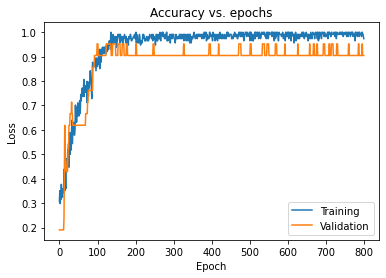

In [19]:
try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

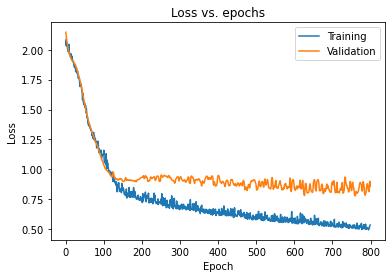

In [20]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [21]:
def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    early_stopping = tf.keras.callbacks.EarlyStopping(mode="min", patience=30)
    learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=20)
    return (early_stopping, learning_rate_reduction)

In [22]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

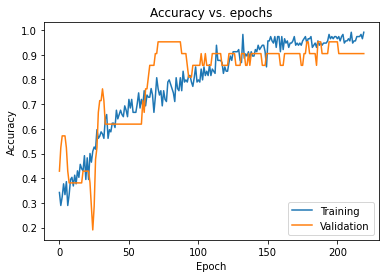

In [23]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

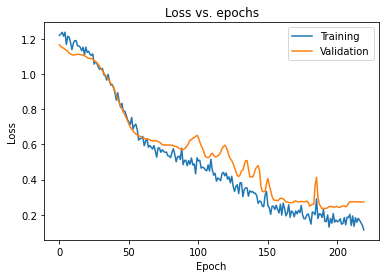

In [24]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [26]:
# Test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.112
Test accuracy: 100.00%
